<div style="font-size:20px; color:pink; margin:20px">
線形分離の限界
</div>
<div style="font-size:14px; color:white; margin:20px">
今回は、これまでとは違いオープンデータではなく、イメージしやすいサンプルデータを用いる
</div>

,X0,X1,Y
0,0.031595,0.986988,0
1,2.115098,-0.046244,1
2,0.882490,-0.075756,0
3,-0.055144,-0.037332,1
4,0.829545,-0.539321,1


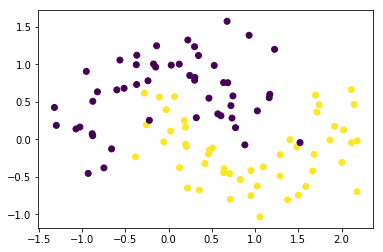

In [3]:
# 必要なライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# データ生成のためのライブラリをインポート
from sklearn.datasets import make_moons
# 実際にデータを生成
X, Y = make_moons(n_samples=100, noise=0.3, random_state=0)
# これまでのCSVと同様に扱えるようにデータを成形
data = pd.DataFrame({'X0':X[:,0], 'X1':X[:,1], 'Y':Y})
# 可視化
plt.scatter(data['X0'], data['X1'], c=data['Y'])
data.head()

<div style="font-size:14px; color:white; margin:20px">
こちらの図を見ると、make_moonsという名前からもわかるように、<br>
円弧状に上下にわかれたデータが生成されています。<br>
5行目のn_samples、noise、random_stateを変化させるとデータも若干変化するので試してみてください。<br>
また、興味のある方は、data.head()等でデータを眺めてみるのも良いでしょう。<br>
<br>
さて、これらのデータを分割する線を引くこと(=学習)を考えていきましょう。<br>
今回は、ロジスティック回帰を使って分類をしてみます。<br>
予測モデルの作成から可視化まで一気にやってしまいましょう。<br>
また、今回は、正解、不正解がわかるように2種類のプロットと分割線も引いていきます。<br>
</div>

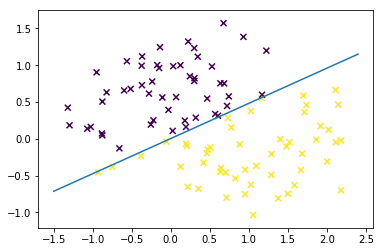

In [6]:
# ロジスティック回帰、numpyのライブラリをインポート
from sklearn.linear_model import LogisticRegression
import numpy as np
# ロジスティック回帰の実行、データ成形、data_predictedへの格納
logisticModel = LogisticRegression()
logisticModel.fit(X, Y)
predicted = pd.DataFrame({'logisPredicted':logisticModel.predict(X)})
data_predicted = pd.concat([data, predicted], axis=1)
# 正解データの可視化
plt.scatter(data_predicted['X0'], data_predicted['X1'], data_predicted['Y'])
# 予測データの可視化 => 予測データはマーカーにバツ印を指
plt.scatter(data_predicted['X0'], data_predicted['X1'], c=data_predicted['logisPredicted'], marker='x')
# 分割線を引く作業
a = logisticModel.coef_[0,0]
b = logisticModel.coef_[0,1]
z = logisticModel.intercept_[0]
x = np.arange(-1.5, 2.5, 0.1)
plt.plot(x, (-a*x-z)/b)

<div style="font-size:14px; color:white; margin:20px">
図中のグラフを見るとわかるように、ロジスティック回帰では直線によって分割します。<br>
これを線形分離と呼びます。<br>
線形回帰の関数Y=aX1+bX2+zを0から1の範囲に押し込めてしまう関数を使用し、分類を行なっていることに起因<br>
実際に、線の上下にバツ印、つまり不正解データが数多く見られます。<br>
ここから、今回のような複雑なデータでは線形分離するのは不可能であることがわかります。<br>
</div>

<div style="font-size:20px; color:pink; margin:20px">
ニューラルネットワーク
</div>
<div style="font-size:14px; color:white; margin:20px">
ロジスティック回帰の代わりにニューラルネットワークという手法を用いるとどうなるかやってみる
</div>

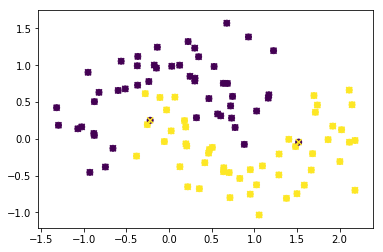

In [9]:
# モデルのインポート
from sklearn.neural_network import MLPClassifier
# モデルの定義
mlpModel = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=(20, ))
mlpModel.fit(X, Y)
mlpModel.predict(X)
predicted = pd.DataFrame({'mlpPredicted':mlpModel.predict(X)})
data_predicted = pd.concat([data, predicted], axis=1)
plt.scatter(data_predicted['X0'], data_predicted['X1'], c=data_predicted['Y'])
plt.scatter(data_predicted['X0'], data_predicted['X1'], c=data_predicted['mlpPredicted'], marker='x')


<div style="font-size:14px; color:white; margin:20px">
さてこちらのグラフを見ると先ほどとは違い、2点を除いて、上手く分類できていることがわかります。<br>
つまり、線形分離できないものもニューラルネットワークを用いることできれいに分類することができるということです。<br>
まずは、ロジスティック回帰とニューラルネットワークの分類の仕方が違うことをイメージできましたでしょうか。<br>
<br>
では、ニューラルネットワークというモデルについて少し考えていきましょう。<br>
脳は、いわゆる神経細胞ニューロンのネットワークによって成り立っています。<br>
これをモデル化(模倣)することで、人間と同じような高度な処理ができるのではないかという期待から<br>
ニューラルネットワークは生まれています。そこで、まずはニューロンのモデル化が行われました。<br>
</div>

<div style="font-size:14px; color:white; margin:20px">
ニューロンを模したモデルとして単純パーセプロトンがあります。
これは、単純な入力層と出力層からなります。x1等の入力に対して、
重みづけされ、閾値を超えた場合は1(発火)を出力します。
実は、閾値を離散的(ステップ)ではなく、なめらかにしたものがロジスティック回帰です。
ロジスティック回帰の関数Y=aX1+bX2+zでいうa、bがこの図でいう重みに相当します。

ただ、先ほどロジスティック回帰で直面したように、
単純な入力層と出力層からだけだと線形分離が不可能な場合に上手く分類することができません。
そこで、中間層として少なくとも1つ以上の隠れ層を追加したニューラルネットワーク(多層パーセプトロン)が提案されました。
これによって、線形分離できないケースもきれいに分類できるような複雑なモデルを作成できるようになったのです。

ニューラルネットワークの特徴は隠れ層にありますが、
隠れ層の層数や、隠れ層のノード数(図でいう隠れ層の◯の数)を調整することでモデルをチューニングすることができます。
隠れ層の役割は、端的に言うと新しい説明変数を生み出すことです。
入力層である説明変数は、物価指数など人間が理解しやすい形が使用されています。
それらを一旦、隠れ層に通すことで、コンピュータが学習した重みづけを受けて、いくつかのノードに格納されます。
それらを説明変数として最後の分類が決定されます。
つまり、学習の結果、人間には理解できない(しにくい)説明変数が隠れ層に生成され、最適な分類をすることになります。

このように人間には理解できないロジックで分類(判断)をするといった部分が、
人間を超えるという期待感を生んでいるのかもしれません。
一方で、現状、機械は我々に納得のいくような説明をしてくれるわけではないということを考慮する必要があります。
人間がさまざまなオペレーションを実行しなくてはならない人間中心社会である以上、
人間に説明する必要があり、そういったデータを取り扱う場合はニューラルネットワークよりも、
決定木やロジスティック回帰の方が良いと思います。
さらに、我々は複雑なモデルを作成することが目的ではなく、あくまで汎化性能の高いモデルを作ることが目的です。
複雑なモデルは、過学習に陥る傾向にある点も注意が必要です。
そういった観点から、マーケティングのように多種多様なデータを取り扱う場合には、
ニューラルネットワークは繊細すぎるように思えます。

<div style="font-size:20px; color:pink; margin:20px">
ディープラーニング
</div>
<div style="font-size:14px; color:white; margin:20px">
では、なぜディープラーニングはこんなに注目されているのでしょうか。
ディープラーニングは、先ほどの隠れ層を多層化したものです。
これは、先ほど実際に取り組んでわかるように、より複雑なモデルを構築することが可能です。
つまり、コンピュータによる、より複雑な推論が多くの隠れ層を通して行われることになります。
人間ができることは、インプットとアウトプットを定義することだけで、
その過程でどんな推論(処理)が行われたかということは、人間には理解できません。
一方で、データに敏感であることには違いはなく、過学習に陥らないように、適切なデータ前処理や大量のデータを必要とします。

では、どういったデータが適切でしょうか。その1つは画像です。
画像はピクセルの数だけデータが存在し、フォーマットもほぼ決まっています。
60×60ピクセルであれば、360個の説明変数が存在し、すべて数字データとして取り扱えます。
ディープラーニングの代表的な使用例として画像認識があげられるのはそのためです。

Googleがディープラーニングを使って猫を認識したのは有名な話ですが、
そのインパクトは、人間が特徴を抽出したのではなく、コンピュータが自律的に特徴を作り出したところにあります。
一般的には、猫といえば、耳がある、目があるというように猫の特徴を設定します。
しかし、ディープラーニングの場合、猫の画像、猫以外の画像を与えるだけで、
勝手にコンピュータが猫の特徴を見つけ出します。
それは人間が考えた特徴とは違う可能性があります。
そうすると、人間では判別できない虎っぽい猫も、
コンピュータなら判別できる可能性があるということです(あくまでも可能性です)。

画像以外にも、音声やセンサデータ等へのディープラーニングの適用が進んでいます。
人間には理解できないという気持ち悪さはありますが、画像認識や音声認識はどう判別したかよりも、
判別できることの方が重要であり、その利便性から応用はどんどん進んでいくでしょう
</div>